# 1. 라이브러리 로드

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. 데이터 로드 및 전처리

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
mar_df = pd.read_csv("/content/drive/MyDrive/DMS/data/features/mar_ear_final/yawn_text_interpolated.csv")
mar_df.head()

,frame_path,label,camera,clip_id,frame_no,MAR,MAR_horiz_dist,MAR_vert_mean,mouth_landmarks,EAR,EAR_horiz_dist,EAR_vert_mean,eyes_landmarks
0,/content/drive/MyDrive/DMS/data/DMD/dmd_frames...,text,NaN,gA-1(File1)_s2_face_2019-03-08-09;21;03_1_0.avi,0,0.002878,0.057904,0.000167,"[[0.4363420605659485, 0.5508670210838318], [0....",0.080339,0.032230,0.005177,"[[0.4778086841106415, 0.4711170792579651], [0...."
1,/content/drive/MyDrive/DMS/data/DMD/dmd_frames...,text,NaN,gA-1(File1)_s2_face_2019-03-08-09;21;03_1_0.avi,1,0.003486,0.059334,0.000207,"[[0.43521493673324585, 0.551755428314209], [0....",0.081129,0.032218,0.005228,"[[0.4772266447544098, 0.47097742557525635], [0..."
2,/content/drive/MyDrive/DMS/data/DMD/dmd_frames...,text,NaN,gA-1(File1)_s2_face_2019-03-08-09;21;03_1_0.avi,2,0.002883,0.057247,0.000165,"[[0.4372491240501404, 0.5514412522315979], [0....",0.091773,0.032968,0.006044,"[[0.47891613841056824, 0.4716135859489441], [0..."
3,/content/drive/MyDrive/DMS/data/DMD/dmd_frames...,text,NaN,gA-1(File1)_s2_face_2019-03-08-09;21;03_1_0.avi,3,0.002449,0.056703,0.000139,"[[0.43684208393096924, 0.5513875484466553], [0...",0.087823,0.032724,0.005740,"[[0.47933903336524963, 0.471530020236969], [0...."
4,/content/drive/MyDrive/DMS/data/DMD/dmd_frames...,text,NaN,gA-1(File1)_s2_face_2019-03-08-09;21;03_1_0.avi,4,0.002148,0.055210,0.000119,"[[0.43647080659866333, 0.5508993268013], [0.44...",0.084379,0.032011,0.005397,"[[0.4789130985736847, 0.47259557247161865], [0..."


In [ ]:
gaze_df = pd.read_csv("/content/drive/MyDrive/DMS/data/features/yaw_pitch_final/final_df_yaw_pitch.csv")

<ipython-input-4-9af2e7db8748>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  gaze_df = pd.read_csv("/content/drive/MyDrive/DMS/data/features/yaw_pitch_final/final_df_yaw_pitch.csv")


In [ ]:
gaze_df.shape

(145635, 11)

In [ ]:
mar_df.shape

(145665, 13)

In [ ]:
yawn_text = gaze_df[gaze_df['label'].isin(['text', 'yawn'])]

In [ ]:
yawn_text['yaw'].isnull().sum()

np.int64(1)

In [ ]:
yawn_text['MAR'].isnull().sum()

15

## 선형보간

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
yawn_text[yawn_text['yaw'].isnull()]

,frame_path,label,camera,clip_id,frame_no,local_frame_path,yaw,pitch,bbox,landmarks,dataset
10734,/content/drive/MyDrive/DMS/data/DMD/dmd_frames_resized/yawn/face_2019-03-13-09;19;23_2_0.avi/frame000035.jpg,yawn,NaN,face_2019-03-13-09;19;23_2_0.avi,35,./data/dmd_frames_resized/yawn/face_2019-03-13-09_19_23_2_0.avi/frame000035.jpg,NaN,NaN,NaN,NaN,DMD


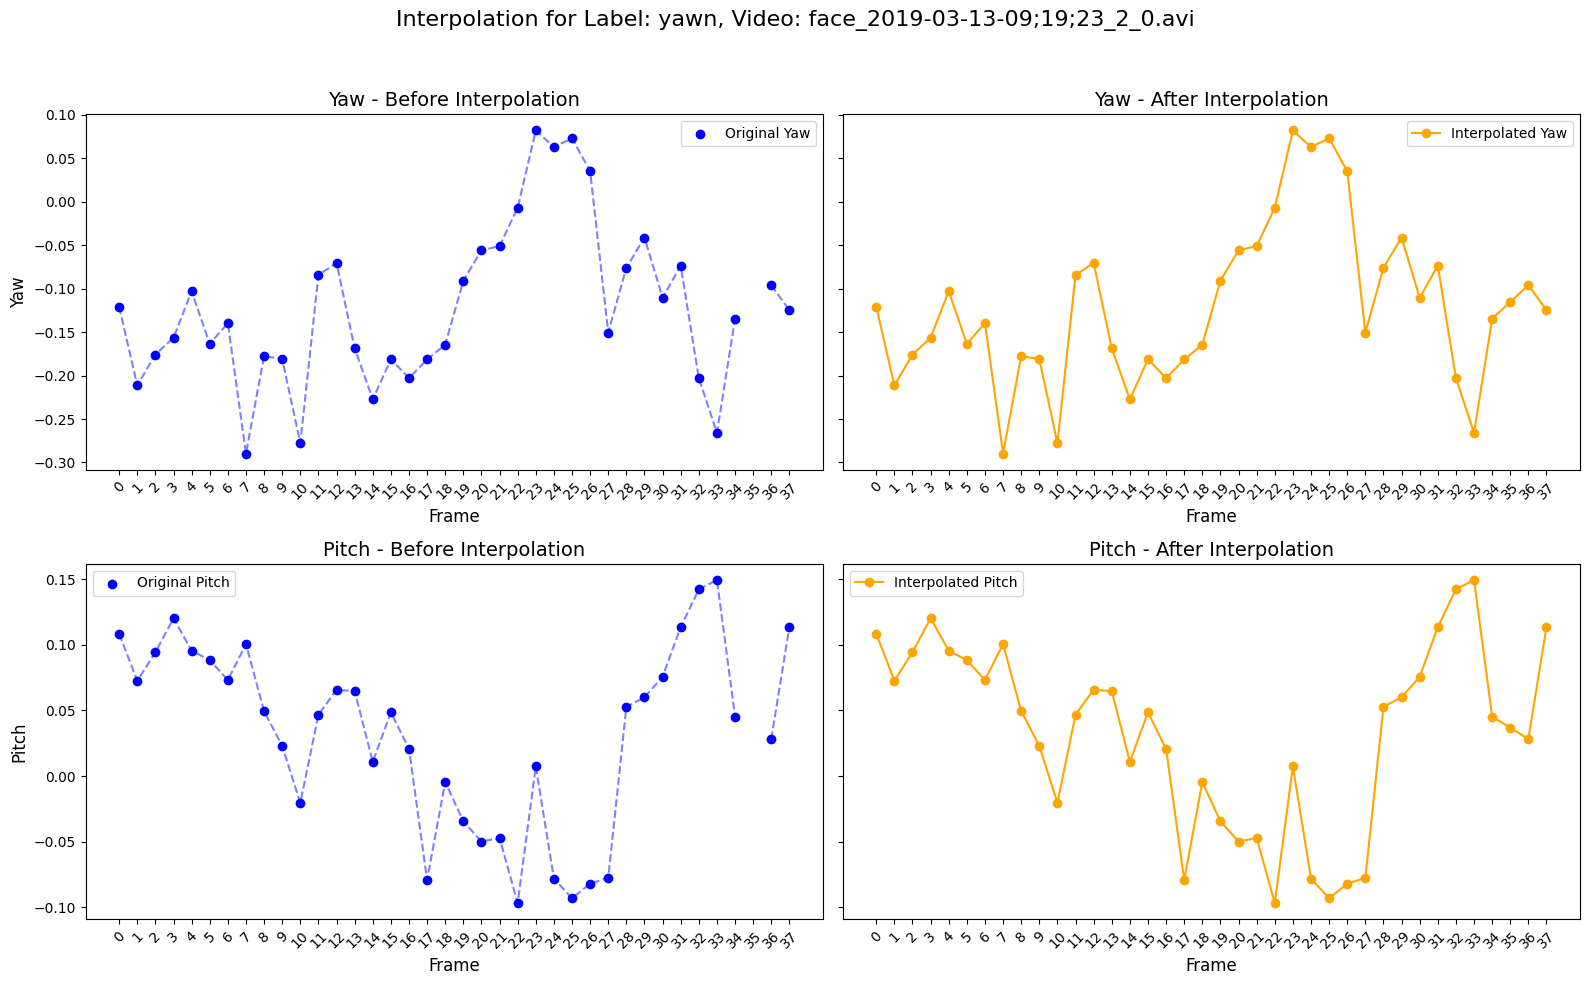

In [ ]:
def visualize_interpolation(df, label, clip_id):
    """
    특정 label과 video_name에 대해 선형 보간 전후의 yaw와 pitch 데이터를 시각화합니다.

    Args:
        df (pd.DataFrame): 원본 데이터프레임.
        label (str): 대상 라벨.
        video_name (str): 대상 비디오 이름.

    Returns:
        None
    """
    # 대상 데이터 필터링
    filtered_df = df[(df['label'] == label) & (df['clip_id'] == clip_id)].sort_values(by='frame_no').reset_index(drop=True)

    # 선형 보간 수행
    interpolated_df = filtered_df.copy()
    interpolated_df['pitch'] = interpolated_df['pitch'].interpolate(method='linear', limit_direction='both')
    interpolated_df['yaw'] = interpolated_df['yaw'].interpolate(method='linear', limit_direction='both')

    # 모든 frame 값을 확보
    all_frames = filtered_df['frame_no']

    # 시각화
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # 2x2 서브플롯 생성

    # Yaw - Before Interpolation
    axes[0, 0].scatter(filtered_df['frame_no'], filtered_df['yaw'], label='Original Yaw', color='blue')  # 마커만 표시
    axes[0, 0].plot(filtered_df['frame_no'], filtered_df['yaw'], linestyle='--', color='blue', alpha=0.5)  # 선 추가
    axes[0, 0].set_title("Yaw - Before Interpolation", fontsize=14)
    axes[0, 0].set_ylabel("Yaw", fontsize=12)
    axes[0, 0].set_xlabel("Frame", fontsize=12)
    axes[0, 0].set_xticks(all_frames)  # 모든 frame 값을 X축에 표시
    axes[0, 0].tick_params(axis='x', rotation=45)  # X축 레이블 회전
    axes[0, 0].legend(fontsize=10)

    # Yaw - After Interpolation
    axes[0, 1].plot(interpolated_df['frame_no'], interpolated_df['yaw'], 'o-', label='Interpolated Yaw', color='orange')
    axes[0, 1].set_title("Yaw - After Interpolation", fontsize=14)
    axes[0, 1].set_xlabel("Frame", fontsize=12)
    axes[0, 1].set_xticks(all_frames)  # 모든 frame 값을 X축에 표시
    axes[0, 1].tick_params(axis='x', rotation=45)  # X축 레이블 회전
    axes[0, 1].tick_params(axis='y', labelleft=False)  # y축 레이블 숨김
    axes[0, 1].legend(fontsize=10)

    # Pitch - Before Interpolation
    axes[1, 0].scatter(filtered_df['frame_no'], filtered_df['pitch'], label='Original Pitch', color='blue')  # 마커만 표시
    axes[1, 0].plot(filtered_df['frame_no'], filtered_df['pitch'], linestyle='--', color='blue', alpha=0.5)  # 선 추가
    axes[1, 0].set_title("Pitch - Before Interpolation", fontsize=14)
    axes[1, 0].set_ylabel("Pitch", fontsize=12)
    axes[1, 0].set_xlabel("Frame", fontsize=12)
    axes[1, 0].set_xticks(all_frames)  # 모든 frame 값을 X축에 표시
    axes[1, 0].tick_params(axis='x', rotation=45)  # X축 레이블 회전
    axes[1, 0].legend(fontsize=10)

    # Pitch - After Interpolation
    axes[1, 1].plot(interpolated_df['frame_no'], interpolated_df['pitch'], 'o-', label='Interpolated Pitch', color='orange')
    axes[1, 1].set_title("Pitch - After Interpolation", fontsize=14)
    axes[1, 1].set_xlabel("Frame", fontsize=12)
    axes[1, 1].set_xticks(all_frames)  # 모든 frame 값을 X축에 표시
    axes[1, 1].tick_params(axis='x', rotation=45)  # X축 레이블 회전
    axes[1, 1].tick_params(axis='y', labelleft=False)  # y축 레이블 숨김
    axes[1, 1].legend(fontsize=10)

    # 전체 제목 추가 및 레이아웃 조정
    fig.suptitle(f"Interpolation for Label: {label}, Video: {video_name}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # 제목과 그래프 간격 조정
    plt.show()

label = "yawn"
video_name = "face_2019-03-13-09;19;23_2_0.avi"
visualize_interpolation(yawn_text, label, video_name)

In [6]:
def interpolate(df):
    # 데이터 정렬
    df = df.sort_values(by=['label', 'clip_id', 'frame_no']).reset_index(drop=True)

    def interpolate_group(group):
        return group.assign(
            yaw=lambda x: x['yaw'].interpolate(method='linear', limit_direction='both'),
            pitch=lambda x: x['pitch'].interpolate(method='linear', limit_direction='both')
        )

    # 3개 컬럼으로 그룹화하여 일괄 처리
    return df.groupby(['label', 'clip_id'], group_keys=False).apply(interpolate_group)

In [8]:
yawn_text_interpolated = interpolate(yawn_text_interpolated)
yawn_text_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21303 entries, 0 to 21302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   frame_path        21303 non-null  object 
 1   label             21303 non-null  object 
 2   camera            6153 non-null   object 
 3   clip_id           21303 non-null  object 
 4   frame_no          21303 non-null  int64  
 5   local_frame_path  21303 non-null  object 
 6   yaw               21303 non-null  float64
 7   pitch             21303 non-null  float64
 8   bbox              21302 non-null  object 
 9   landmarks         21302 non-null  object 
 10  dataset           21303 non-null  object 
 11  MAR               21303 non-null  float64
 12  EAR               21303 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 2.3+ MB


<ipython-input-6-d301a24af956>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(['label', 'clip_id'], group_keys=False).apply(interpolate_group)


In [9]:
yawn_text_interpolated.to_csv("/content/drive/MyDrive/DMS/data/features/yaw_pitch_final/yawn_text_interpolated.csv", index=False)

In [10]:
yawn_text_interpolated.isna().sum()

,0
frame_path,0
label,0
camera,15150
clip_id,0
frame_no,0
local_frame_path,0
yaw,0
pitch,0
bbox,1
landmarks,1


In [ ]:
mar_df.shape

(21303, 13)

In [ ]:
yawn_text_interpolated.shape

(21303, 13)